___
# PROJETO 3: PREDIÇÃO
___
    
### Integrantes:
    1. Bernardo Sarcinelli  
    2. Daniel Freitas
    3. Maria Eduarda Rocha

<div id="leitura"></div>

## INTRODUÇÃO

In [16]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import numpy as np

## Base de Dados Escolhida:
Para este projeto utilizaremos a Base de Dados referente ao 4° semestre de 2023.
O arquivo utilizado foi disponibilizado do notebook 'Leitura PNADC 2023' por meio do link
https://www.dropbox.com/scl/fi/ksca0i4ybo6hno738pjcw/pnad23_4.csv?rlkey=e186niofxka6lmmlbkefr94zw&st=wntcupiu&dl=1,
sendo baixado como 'pnad23_4' no formato csv, logo, 'pnad23_4.csv'.

In [17]:
filename = 'pnad23_4.csv'

if filename in os.listdir():
    print(f'Parece que o arquivo {filename} está na mesma pasta do notebook, yay!')
    
else:
    print(f'Não encontrei o arquivo {filename}.\n'
          f'Esse deve ser salvo na mesma pasta em que se encontrar este arquivo jupyter notebook')

Não encontrei o arquivo pnad23_4.csv.
Esse deve ser salvo na mesma pasta em que se encontrar este arquivo jupyter notebook


In [21]:
# Leitura dos Dados correspondentes

dados = pd.read_csv('pnad23_4.csv')
print('DADOS - QUARTO SEMESTRE (2023)')
dados

DADOS - QUARTO SEMESTRE (2023)


,Ano,Trimestre,UF,Capital,RM_RIDE,UPA,Estrato,V1008,V1014,V1016,...,V1028191,V1028192,V1028193,V1028194,V1028195,V1028196,V1028197,V1028198,V1028199,V1028200
0,2023,4,11,11.0,NaN,110000016,1110011,1,10,5,...,309.630691,961.950570,327.243550,0.0,0.000000,0.0,674.475073,358.970348,292.658661,690.889317
1,2023,4,11,11.0,NaN,110000016,1110011,1,10,5,...,309.630691,961.950570,327.243550,0.0,0.000000,0.0,674.475073,358.970348,292.658661,690.889317
2,2023,4,11,11.0,NaN,110000016,1110011,2,10,5,...,175.916359,512.399129,176.708843,0.0,0.000000,0.0,378.226179,197.177218,158.596782,357.260151
3,2023,4,11,11.0,NaN,110000016,1110011,3,10,5,...,345.320733,1013.292950,358.249489,0.0,0.000000,0.0,758.636016,399.415616,310.512617,754.605577
4,2023,4,11,11.0,NaN,110000016,1110011,3,10,5,...,345.320733,1013.292950,358.249489,0.0,0.000000,0.0,758.636016,399.415616,310.512617,754.605577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473201,2023,4,53,53.0,NaN,530060880,5310111,12,11,3,...,0.000000,755.120680,0.000000,0.0,382.269011,0.0,778.608964,816.826409,0.000000,0.000000
473202,2023,4,53,53.0,NaN,530060880,5310111,12,11,3,...,0.000000,755.120680,0.000000,0.0,382.269011,0.0,778.608964,816.826409,0.000000,0.000000
473203,2023,4,53,53.0,NaN,530060880,5310111,14,11,3,...,0.000000,677.804483,0.000000,0.0,347.520587,0.0,682.776135,707.652015,0.000000,0.000000
473204,2023,4,53,53.0,NaN,530060880,5310111,14,11,3,...,0.000000,677.804483,0.000000,0.0,347.520587,0.0,682.776135,707.652015,0.000000,0.000000


In [19]:
# Especificação das Colunas que serão utilizadas
colunas = [
           'UF',    # Estado
           'V2007', # Sexo
           'V2010', # Cor ou raça
           'V2009', # Idade
           'V3001', # Alfabetizado
           'V3008', # Frequentou a escola
           'VD3004', # Nível de Escolaridade
           'V4012', # Tipo de ocupação
           'VD4014', # Faixa de horas trabalhadas
           'VD4017', # Rendimento Mensal Efetivo
           'V403411', # Faixa de Rendimento [em SM - Salário Mínimo]
           'V1022', # Situação do domicílio          
]   

In [22]:
# Filtrando apenas as colunas desejadas
dados_colunas = dados[colunas]

In [23]:
# Renomeando as colunas
dados_colunas = dados_colunas.rename(columns={
    'UF': 'Estado',
    'V2007': 'Sexo',
    'V2010': 'Cor_Raça',
    'V2009': 'Idade',
    'V3001': 'Alfabetizado',
    'V3008': 'Frequentou a Escola',
    'VD3004': 'Nível de Instruçao',
    'V4012': 'Tipo de Ocupacao',
    'VD4014': 'Faixa de horas trabalhadas',
    'VD4017': 'Rendimento Mensal Efetivo',
    'V403411': 'Faixa de Rendimento [em SM]',
    'V1022': 'Situacao do Domicílio'
})

In [24]:
# Reconfigurando as informações das colunas

# Estado
dados_colunas['Estado'] = dados_colunas['Estado'].astype('category')
dados_colunas['Estado'] = dados_colunas['Estado'].cat.rename_categories({
    11: 'Rondônia', 12: 'Acre', 13: 'Amazonas', 14: 'Roraima', 15: 'Pará', 
    16: 'Amapá', 17: 'Tocantins', 21: 'Maranhão', 22: 'Piauí', 23: 'Ceará', 
    24: 'Rio Grande do Norte', 25: 'Paraíba', 26: 'Pernambuco', 27: 'Alagoas', 
    28: 'Sergipe', 29: 'Bahia', 31: 'Minas Gerais', 32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 35: 'São Paulo', 41: 'Paraná', 42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 50: 'Mato Grosso do Sul', 51: 'Mato Grosso', 
    52: 'Goiás', 53: 'Distrito Federal'
})

# Sexo
dados_colunas['Sexo'] = dados_colunas['Sexo'].astype('category')
dados_colunas['Sexo'] = dados_colunas['Sexo'].cat.rename_categories({1: 'Homem', 2: 'Mulher'})

# Cor_Raça
dados_colunas['Cor_Raça'] = dados_colunas['Cor_Raça'].astype('category')
dados_colunas['Cor_Raça'] = dados_colunas['Cor_Raça'].cat.rename_categories({
    1: 'Branca', 2: 'Preta', 3: 'Amarela', 4: 'Parda', 5: 'Indígena', 9: 'Ignorado'})

# Alfabetizado
dados_colunas['Alfabetizado'] = dados_colunas['Alfabetizado'].astype('category')
dados_colunas['Alfabetizado'] = dados_colunas['Alfabetizado'].cat.rename_categories({1: 'Sim', 2: 'Não'})

# Frequentou_Escola
dados_colunas['Frequentou a Escola'] = dados_colunas['Frequentou a Escola'].astype('category')
dados_colunas['Frequentou a Escola'] = dados_colunas['Frequentou a Escola'].cat.rename_categories({1: 'Sim', 2: 'Não'})

# Nível de Instruçao
dados_colunas['Nível de Instruçao'] = dados_colunas['Nível de Instruçao'].astype('category')
dados_colunas['Nível de Instruçao'] = dados_colunas['Nível de Instruçao'].cat.rename_categories({
    1: 'Sem instrução e menos de 1 ano de estudo',
    2: 'Fundamental incompleto ou equivalente',
    3: 'Fundamental completo ou equivalente',
    4: 'Médio incompleto ou equivalente',
    5: 'Médio completo ou equivalente',
    6: 'Superior incompleto ou equivalente',
    7: 'Superior completo'
})

# Tipo_Ocupacao
dados_colunas['Tipo de Ocupacao'] = dados_colunas['Tipo de Ocupacao'].astype('category')
dados_colunas['Tipo de Ocupacao'] = dados_colunas['Tipo de Ocupacao'].cat.rename_categories({
    1: 'Trabalhador doméstico', 
    2: 'Militar ou segurança pública', 
    3: 'Empregado setor privado', 
    4: 'Empregado setor público', 
    5: 'Conta própria', 
    6: 'Empregador', 
    7: 'Trabalhador familiar não remunerado', 
    9: 'Não aplicável'
})

# Faixa de horas trabalhadas
dados_colunas['Faixa de horas trabalhadas'] = dados_colunas['Faixa de horas trabalhadas'].astype('category')
dados_colunas['Faixa de horas trabalhadas'] = dados_colunas['Faixa de horas trabalhadas'].cat.rename_categories({
    1: 'Até 14 horas', 
    2: '15 a 39 horas', 
    3: '40 a 44 horas', 
    4: '45 a 48 horas', 
    5: '49 horas ou mais', 
})

# Situacao_Domicilio
dados_colunas['Situacao do Domicílio'] = dados_colunas['Situacao do Domicílio'].astype('category')
dados_colunas['Situacao do Domicílio'] = dados_colunas['Situacao do Domicílio'].cat.rename_categories({1: 'Urbana', 2: 'Rural'})

# Faixa_Rendimento
dados_colunas['Faixa de Rendimento [em SM]'] = dados_colunas['Faixa de Rendimento [em SM]'].astype('category')
dados_colunas['Faixa de Rendimento [em SM]'] = dados_colunas['Faixa de Rendimento [em SM]'].cat.rename_categories({
    0: '0',
    1: '0 a 0,5',
    2: '0,5 a 1',
    3: '1 a 2',
    4: '2 a 3',
    5: '3 a 5',
    6: '5 a 10',
    7: '10 a 20',
    8: '20 ou mais',
})

dados_colunas['Idade'] = dados_colunas['Idade'].astype('Int64')
dados_colunas['Rendimento Mensal Efetivo'] = dados_colunas['Rendimento Mensal Efetivo'].astype('Int64')

In [25]:
# Filtrando apenas pessoas com 18 ou mais anos de Idade e Removendo NaN
dados_colunas = dados_colunas[(dados_colunas['Idade'] >= 18) & (dados_colunas['Idade'] <= 80)]
dados_colunas = dados_colunas.dropna(subset=['Rendimento Mensal Efetivo'])
dados_colunas = dados_colunas[dados_colunas['Rendimento Mensal Efetivo'] <= 5000]


In [26]:
dados_colunas

,Estado,Sexo,Cor_Raça,Idade,Alfabetizado,Frequentou a Escola,Nível de Instruçao,Tipo de Ocupacao,Faixa de horas trabalhadas,Rendimento Mensal Efetivo,Faixa de Rendimento [em SM],Situacao do Domicílio
0,Rondônia,Homem,Parda,31,Sim,Sim,Médio completo ou equivalente,Empregador,40 a 44 horas,5000,3 a 5,Urbana
2,Rondônia,Mulher,Parda,50,Sim,Sim,Superior completo,Empregado setor público,15 a 39 horas,3500,2 a 3,Urbana
7,Rondônia,Mulher,Branca,55,Sim,Sim,Superior completo,Empregado setor público,15 a 39 horas,3500,2 a 3,Urbana
9,Rondônia,Homem,Parda,36,Sim,Sim,Fundamental completo ou equivalente,Empregador,40 a 44 horas,3000,2 a 3,Urbana
11,Rondônia,Homem,Branca,33,Sim,Sim,Médio completo ou equivalente,Empregador,40 a 44 horas,3000,2 a 3,Urbana
...,...,...,...,...,...,...,...,...,...,...,...,...
473189,Distrito Federal,Mulher,Parda,34,Sim,Sim,Médio completo ou equivalente,Empregado setor privado,40 a 44 horas,2200,1 a 2,Urbana
473197,Distrito Federal,Mulher,Branca,46,Sim,Sim,Médio completo ou equivalente,Empregado setor público,40 a 44 horas,2600,1 a 2,Urbana
473202,Distrito Federal,Homem,Branca,24,Sim,Sim,Superior completo,Empregado setor privado,15 a 39 horas,5000,3 a 5,Urbana
473203,Distrito Federal,Homem,Branca,51,Sim,Sim,Superior completo,Empregador,40 a 44 horas,5000,3 a 5,Urbana


In [27]:
# Adicionando as respectivas regiões

norte = ['Amazonas', 'Roraima', 'Amapá', 'Pará', 'Tocantins', 'Rondônia', 'Acre']
sul = ['Paraná', 'Rio Grande do Sul', 'Santa Catarina']
sudeste = ['São Paulo', 'Rio de Janeiro', 'Espírito Santo', 'Minas Gerais']
nordeste = ['Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Pernambuco', 'Paraíba', 'Sergipe', 'Alagoas', 'Bahia']
centro_oeste = ['Mato Grosso', 'Mato Grosso do Sul', 'Goiás', 'Distrito Federal']

def regiao(estado):
    if estado in norte:
        return 'Norte'
    elif estado in sul:
        return 'Sul'
    elif estado in sudeste:
        return 'Sudeste'
    elif estado in nordeste:
        return 'Nordeste'
    elif estado in centro_oeste:
        return 'Centro-Oeste'
    else:
        return 'Desconhecido'

dados_colunas['Regiao'] = dados_colunas['Estado'].apply(regiao)

dados_colunas

,Estado,Sexo,Cor_Raça,Idade,Alfabetizado,Frequentou a Escola,Nível de Instruçao,Tipo de Ocupacao,Faixa de horas trabalhadas,Rendimento Mensal Efetivo,Faixa de Rendimento [em SM],Situacao do Domicílio,Regiao
0,Rondônia,Homem,Parda,31,Sim,Sim,Médio completo ou equivalente,Empregador,40 a 44 horas,5000,3 a 5,Urbana,Norte
2,Rondônia,Mulher,Parda,50,Sim,Sim,Superior completo,Empregado setor público,15 a 39 horas,3500,2 a 3,Urbana,Norte
7,Rondônia,Mulher,Branca,55,Sim,Sim,Superior completo,Empregado setor público,15 a 39 horas,3500,2 a 3,Urbana,Norte
9,Rondônia,Homem,Parda,36,Sim,Sim,Fundamental completo ou equivalente,Empregador,40 a 44 horas,3000,2 a 3,Urbana,Norte
11,Rondônia,Homem,Branca,33,Sim,Sim,Médio completo ou equivalente,Empregador,40 a 44 horas,3000,2 a 3,Urbana,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...
473189,Distrito Federal,Mulher,Parda,34,Sim,Sim,Médio completo ou equivalente,Empregado setor privado,40 a 44 horas,2200,1 a 2,Urbana,Centro-Oeste
473197,Distrito Federal,Mulher,Branca,46,Sim,Sim,Médio completo ou equivalente,Empregado setor público,40 a 44 horas,2600,1 a 2,Urbana,Centro-Oeste
473202,Distrito Federal,Homem,Branca,24,Sim,Sim,Superior completo,Empregado setor privado,15 a 39 horas,5000,3 a 5,Urbana,Centro-Oeste
473203,Distrito Federal,Homem,Branca,51,Sim,Sim,Superior completo,Empregador,40 a 44 horas,5000,3 a 5,Urbana,Centro-Oeste


# Análise Exploratória de Dados

In [28]:
# FILTRANDO AS REGIÕES

# Norte
dados_colunas_Norte = dados_colunas[dados_colunas['Regiao'] == 'Norte' ]

# Sul
dados_colunas_Sul = dados_colunas[dados_colunas['Regiao'] == 'Sul' ]

# Sudeste
dados_colunas_Sudeste = dados_colunas[dados_colunas['Regiao'] == 'Sudeste' ]

# Centro-Oeste
dados_colunas_Centro_Oeste = dados_colunas[dados_colunas['Regiao'] == 'Centro-Oeste' ]

# Nordeste
dados_colunas_Nordeste = dados_colunas[dados_colunas['Regiao'] == 'Nordeste' ]

### Brasil (Todas as Regiões)

Nível de Instruçao,Sem instrução e menos de 1 ano de estudo,Fundamental incompleto ou equivalente,Fundamental completo ou equivalente,Médio incompleto ou equivalente,Médio completo ou equivalente,Superior incompleto ou equivalente,Superior completo
Regiao,,,,,,,
Centro-Oeste,468,4361,1398,1552,6840,1341,3529
Nordeste,2979,13793,3543,3384,18242,2389,7070
Norte,991,5552,1538,1628,8743,1280,3635
Sudeste,816,10749,3912,3209,19874,2936,8985
Sul,518,7395,3417,2244,11925,2157,5703


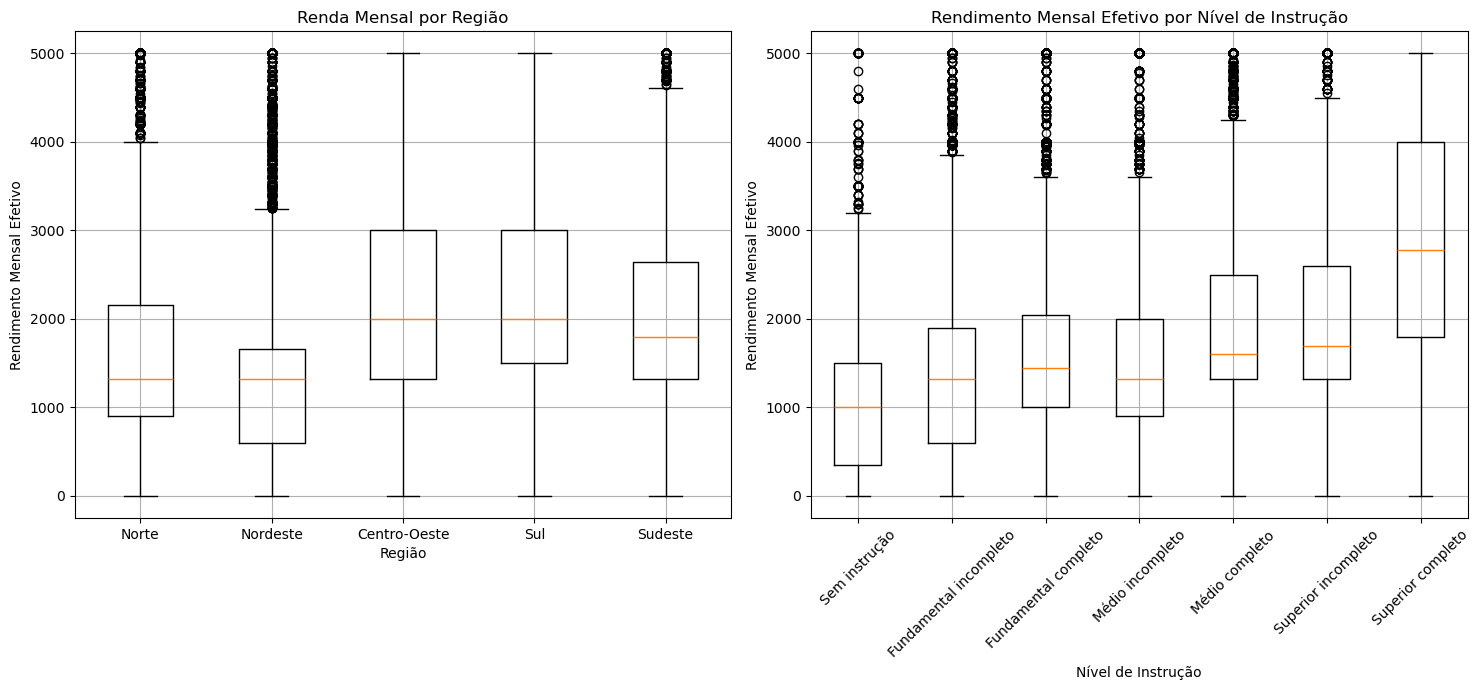

In [29]:
# RELAÇÕES BRASIL

Brasil = pd.crosstab(dados_colunas['Regiao'],dados_colunas['Nível de Instruçao'])
display(Brasil)

# --------------------------------------------

fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Primeiro gráfico: Rendimento Mensal por Região
axes[0].boxplot(
    [
        dados_colunas_Norte['Rendimento Mensal Efetivo'],
        dados_colunas_Nordeste['Rendimento Mensal Efetivo'],
        dados_colunas_Centro_Oeste['Rendimento Mensal Efetivo'],
        dados_colunas_Sul['Rendimento Mensal Efetivo'],
        dados_colunas_Sudeste['Rendimento Mensal Efetivo']
    ],
    labels=['Norte', 'Nordeste', 'Centro-Oeste', 'Sul', 'Sudeste']
)
axes[0].grid()
axes[0].set_ylabel('Rendimento Mensal Efetivo')
axes[0].set_xlabel('Região')
axes[0].set_title('Renda Mensal por Região')

# Segundo gráfico: Rendimento Mensal Efetivo por Nível de Instrução
axes[1].boxplot(
    [
        dados_colunas[dados_colunas['Nível de Instruçao'] == 'Sem instrução e menos de 1 ano de estudo']['Rendimento Mensal Efetivo'],
        dados_colunas[dados_colunas['Nível de Instruçao'] == 'Fundamental incompleto ou equivalente']['Rendimento Mensal Efetivo'],
        dados_colunas[dados_colunas['Nível de Instruçao'] == 'Fundamental completo ou equivalente']['Rendimento Mensal Efetivo'],
        dados_colunas[dados_colunas['Nível de Instruçao'] == 'Médio incompleto ou equivalente']['Rendimento Mensal Efetivo'],
        dados_colunas[dados_colunas['Nível de Instruçao'] == 'Médio completo ou equivalente']['Rendimento Mensal Efetivo'],
        dados_colunas[dados_colunas['Nível de Instruçao'] == 'Superior incompleto ou equivalente']['Rendimento Mensal Efetivo'],
        dados_colunas[dados_colunas['Nível de Instruçao'] == 'Superior completo']['Rendimento Mensal Efetivo']
    ],
    labels=['Sem instrução', 'Fundamental incompleto', 'Fundamental completo', 'Médio incompleto', 'Médio completo', 'Superior incompleto', 'Superior completo']
)
axes[1].grid()
axes[1].set_ylabel('Rendimento Mensal Efetivo')
axes[1].set_xlabel('Nível de Instrução')
axes[1].set_title('Rendimento Mensal Efetivo por Nível de Instrução')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### REGIÃO NORTE

In [30]:
# RELAÇÕES - REGIÃO NORTE

Norte = pd.crosstab(dados_colunas_Norte['Nível de Instruçao'],dados_colunas_Norte['Faixa de Rendimento [em SM]'])
display(Norte)

Faixa de Rendimento [em SM],0,"0 a 0,5","0,5 a 1",1 a 2,2 a 3,3 a 5
Nível de Instruçao,,,,,,
Sem instrução e menos de 1 ano de estudo,73,277,356,223,37,23
Fundamental incompleto ou equivalente,392,1463,1879,1387,308,119
Fundamental completo ou equivalente,83,285,541,463,117,49
Médio incompleto ou equivalente,61,330,612,508,78,39
Médio completo ou equivalente,231,1035,3039,3181,856,399
Superior incompleto ou equivalente,29,107,445,459,156,84
Superior completo,29,95,514,1231,925,841


### REGIÃO NORDESTE

In [31]:
# RELAÇÕES - REGIÃO Nordeste

Nordeste = pd.crosstab(dados_colunas_Nordeste['Nível de Instruçao'],dados_colunas_Nordeste['Faixa de Rendimento [em SM]'])
display(Nordeste)

Faixa de Rendimento [em SM],0,"0 a 0,5","0,5 a 1",1 a 2,2 a 3,3 a 5
Nível de Instruçao,,,,,,
Sem instrução e menos de 1 ano de estudo,194,1482,884,293,35,17
Fundamental incompleto ou equivalente,640,5588,5038,1944,291,127
Fundamental completo ou equivalente,149,1148,1331,698,137,58
Médio incompleto ou equivalente,107,1068,1332,705,114,46
Médio completo ou equivalente,399,3524,7505,5198,1050,528
Superior incompleto ou equivalente,43,288,987,735,219,117
Superior completo,106,305,1517,2335,1453,1352


### REGIÃO CENTRO-OESTE

In [32]:
# RELAÇÕES - REGIÃO Centro-Oeste

Centro_Oeste = pd.crosstab(dados_colunas_Centro_Oeste['Nível de Instruçao'],dados_colunas_Centro_Oeste['Faixa de Rendimento [em SM]'])
display(Centro_Oeste)

Faixa de Rendimento [em SM],0,"0 a 0,5","0,5 a 1",1 a 2,2 a 3,3 a 5
Nível de Instruçao,,,,,,
Sem instrução e menos de 1 ano de estudo,14,77,153,160,50,14
Fundamental incompleto ou equivalente,123,516,1128,1773,571,250
Fundamental completo ou equivalente,29,135,343,596,203,92
Médio incompleto ou equivalente,28,121,388,701,222,92
Médio completo ou equivalente,118,352,1510,3176,1054,630
Superior incompleto ou equivalente,24,63,350,565,211,128
Superior completo,50,50,337,1143,951,998


### REGIÃO SUDESTE

In [33]:
# RELAÇÕES - REGIÃO Sudeste

Sudeste = pd.crosstab(dados_colunas_Sudeste['Nível de Instruçao'],dados_colunas_Sudeste['Faixa de Rendimento [em SM]'])
display(Sudeste)

Faixa de Rendimento [em SM],0,"0 a 0,5","0,5 a 1",1 a 2,2 a 3,3 a 5
Nível de Instruçao,,,,,,
Sem instrução e menos de 1 ano de estudo,22,141,264,307,65,17
Fundamental incompleto ou equivalente,362,1497,3427,4192,876,388
Fundamental completo ou equivalente,96,324,1160,1712,431,189
Médio incompleto ou equivalente,68,330,965,1406,282,158
Médio completo ou equivalente,307,1117,4587,9531,2896,1435
Superior incompleto ou equivalente,47,149,626,1301,476,337
Superior completo,98,170,716,3106,2406,2489


### REGIÃO SUL

In [34]:
# RELAÇÕES - REGIÃO Sul

Sul = pd.crosstab(dados_colunas_Sul['Nível de Instruçao'],dados_colunas_Sul['Faixa de Rendimento [em SM]'])
display(Sul)

Faixa de Rendimento [em SM],0,"0 a 0,5","0,5 a 1",1 a 2,2 a 3,3 a 5
Nível de Instruçao,,,,,,
Sem instrução e menos de 1 ano de estudo,13,53,92,287,56,17
Fundamental incompleto ou equivalente,370,718,1591,3316,960,437
Fundamental completo ou equivalente,106,223,561,1694,584,247
Médio incompleto ou equivalente,51,135,409,1152,336,161
Médio completo ou equivalente,222,367,1441,6344,2306,1244
Superior incompleto ou equivalente,41,79,322,1010,438,267
Superior completo,99,52,341,1901,1544,1766


### GRÁFICOS DAS REGIÕES

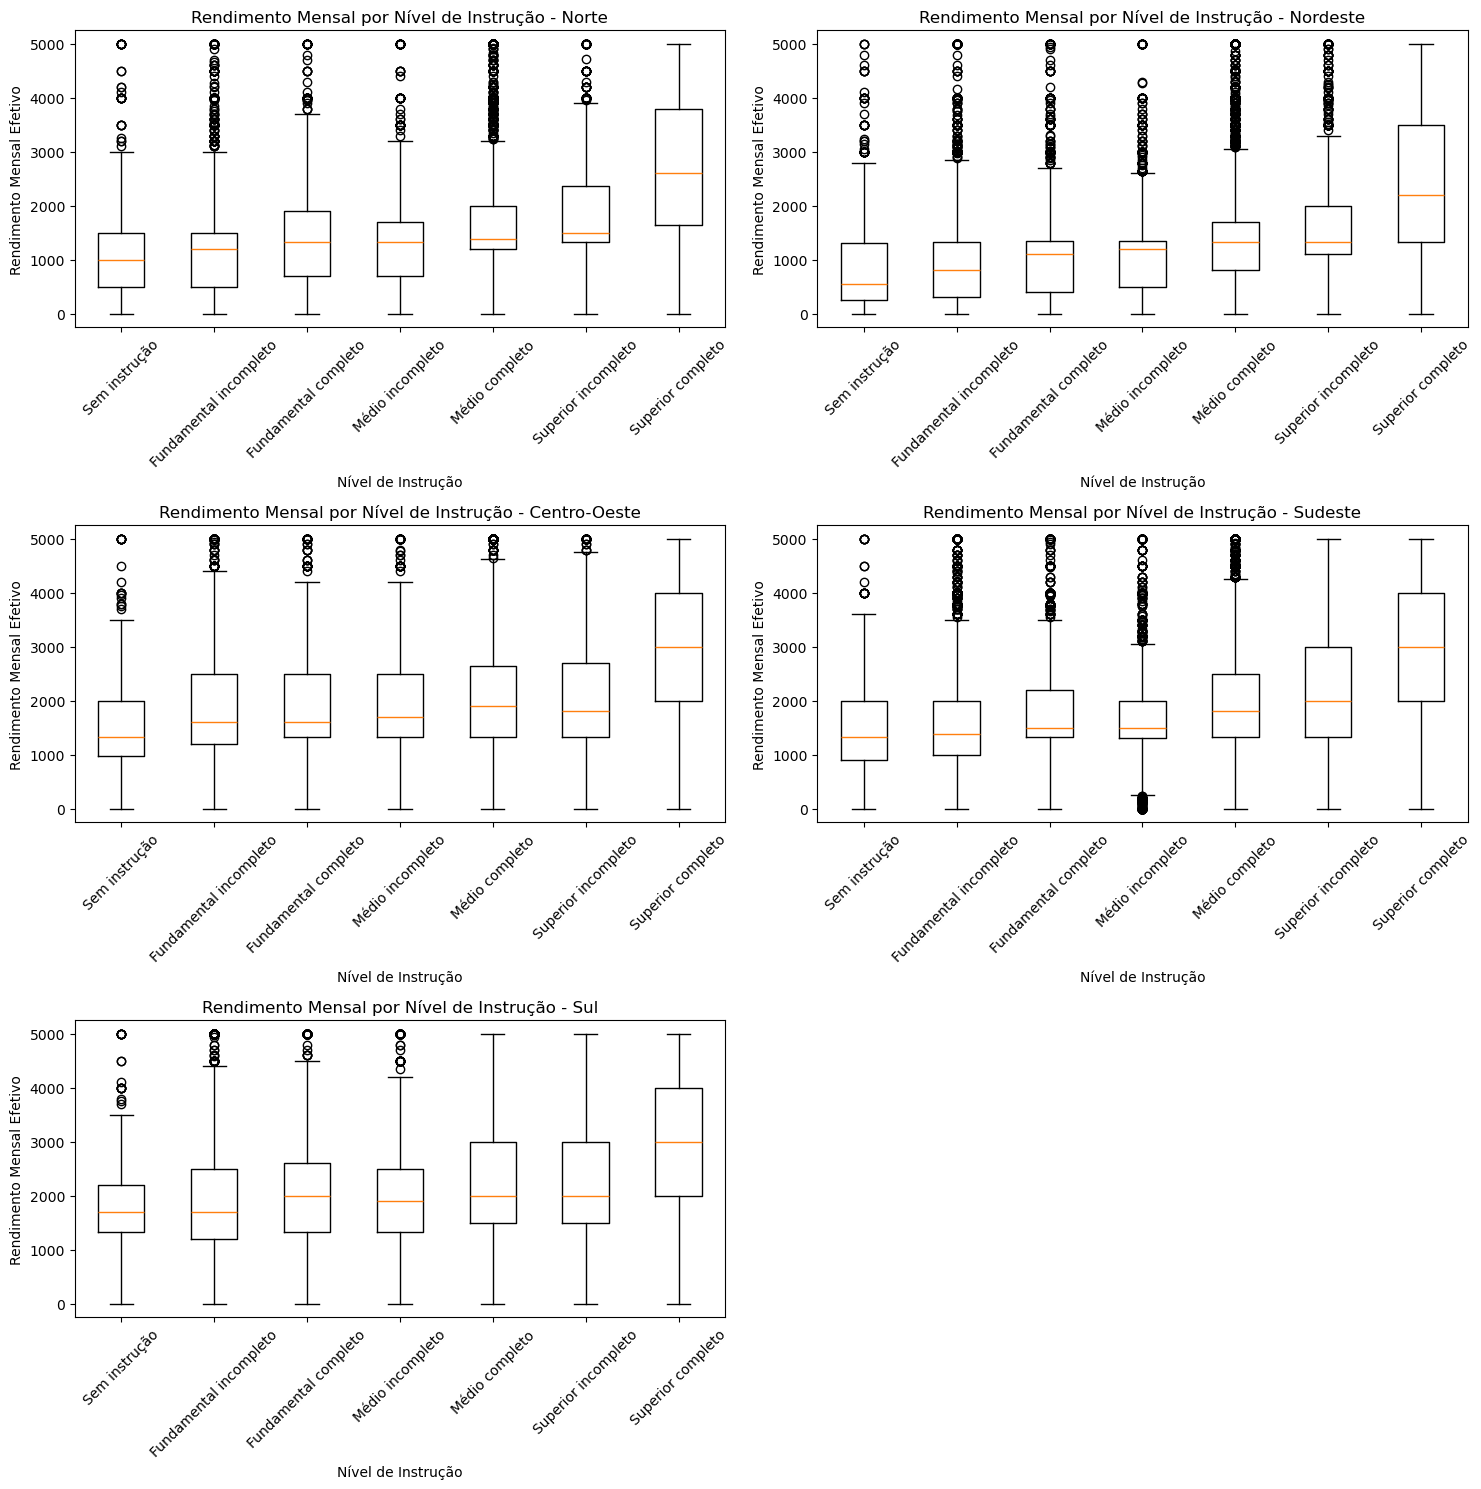

In [35]:
# Dados de cada região
dados_regioes = {
    "Norte": dados_colunas_Norte,
    "Nordeste": dados_colunas_Nordeste,
    "Centro-Oeste": dados_colunas_Centro_Oeste,
    "Sudeste": dados_colunas_Sudeste,
    "Sul": dados_colunas_Sul
}

# Títulos das colunas
labels = ['Sem instrução', 'Fundamental incompleto', 'Fundamental completo', 
          'Médio incompleto', 'Médio completo', 'Superior incompleto', 'Superior completo']

# Criando o layout de subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))  # 3 linhas, 2 colunas para 5 gráficos (o último será vazio)

# Iterando sobre as regiões
for ax, (regiao, dados) in zip(axes.flat, dados_regioes.items()):
    # Gerando os boxplots para cada região
    ax.boxplot([
        dados[dados['Nível de Instruçao'] == 'Sem instrução e menos de 1 ano de estudo']['Rendimento Mensal Efetivo'],
        dados[dados['Nível de Instruçao'] == 'Fundamental incompleto ou equivalente']['Rendimento Mensal Efetivo'],
        dados[dados['Nível de Instruçao'] == 'Fundamental completo ou equivalente']['Rendimento Mensal Efetivo'],
        dados[dados['Nível de Instruçao'] == 'Médio incompleto ou equivalente']['Rendimento Mensal Efetivo'],
        dados[dados['Nível de Instruçao'] == 'Médio completo ou equivalente']['Rendimento Mensal Efetivo'],
        dados[dados['Nível de Instruçao'] == 'Superior incompleto ou equivalente']['Rendimento Mensal Efetivo'],
        dados[dados['Nível de Instruçao'] == 'Superior completo']['Rendimento Mensal Efetivo']
    ], labels=labels)

    # Configurações de estilo
    ax.set_title(f'Rendimento Mensal por Nível de Instrução - {regiao}')
    ax.set_ylabel('Rendimento Mensal Efetivo')
    ax.set_xlabel('Nível de Instrução')
    ax.tick_params(axis='x', rotation=45)

# Remover o último gráfico vazio se necessário
if len(dados_regioes) < len(axes.flat):
    axes.flat[-1].set_visible(False)

# Ajustando espaçamento
plt.tight_layout()
plt.show()


## Regressão Linear


In [36]:
a = pd.get_dummies(dados_colunas,dtype=int, drop_first=True)
dados_colunas4=pd.concat([a],axis=1)
dados_colunas4['Situacao do Domicílio_Rural']
dados_colunas4['Rendimento Mensal Efetivo'] = dados_colunas4['Rendimento Mensal Efetivo'].astype('int32')
dados_colunas4['Idade'] = dados_colunas4["Idade"].astype('int32')
dados_colunas4['Situacao do Domicílio_Rural'] = dados_colunas4['Situacao do Domicílio_Rural'].astype('int32')

In [37]:
tamanho = len(dados_colunas)
tamanho_treino = len(dados_colunas)*0.8
dados_colunas2 = dados_colunas.sample(int(tamanho))
dados_colunas_treino = dados_colunas4.iloc[:int(tamanho_treino)]
dados_colunas_teste = dados_colunas4.iloc[int(tamanho_treino):tamanho]
dados_colunas_teste

,Idade,Rendimento Mensal Efetivo,Estado_Acre,Estado_Amazonas,Estado_Roraima,Estado_Pará,Estado_Amapá,Estado_Tocantins,Estado_Maranhão,Estado_Piauí,...,Faixa de Rendimento [em SM]_2 a 3,Faixa de Rendimento [em SM]_3 a 5,Faixa de Rendimento [em SM]_5 a 10,Faixa de Rendimento [em SM]_10 a 20,Faixa de Rendimento [em SM]_20 ou mais,Situacao do Domicílio_Rural,Regiao_Nordeste,Regiao_Norte,Regiao_Sudeste,Regiao_Sul
388151,41,5000,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
388154,54,5000,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
388159,34,3000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
388160,28,1320,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
388163,55,2000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473189,34,2200,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
473197,46,2600,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
473202,24,5000,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
473203,51,5000,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [38]:
dados_colunas_treino

,Idade,Rendimento Mensal Efetivo,Estado_Acre,Estado_Amazonas,Estado_Roraima,Estado_Pará,Estado_Amapá,Estado_Tocantins,Estado_Maranhão,Estado_Piauí,...,Faixa de Rendimento [em SM]_2 a 3,Faixa de Rendimento [em SM]_3 a 5,Faixa de Rendimento [em SM]_5 a 10,Faixa de Rendimento [em SM]_10 a 20,Faixa de Rendimento [em SM]_20 ou mais,Situacao do Domicílio_Rural,Regiao_Nordeste,Regiao_Norte,Regiao_Sudeste,Regiao_Sul
0,31,5000,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,50,3500,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
7,55,3500,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
9,36,3000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
11,33,3000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388141,43,3500,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
388144,61,1800,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
388146,38,700,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
388147,39,600,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Treino

In [39]:
# Alpha escolhido = 5% (0.05)

X = dados_colunas_treino[['Regiao_Nordeste','Regiao_Norte','Regiao_Sudeste','Regiao_Sul','Idade','Frequentou a Escola_Não',
       'Nível de Instruçao_Fundamental incompleto ou equivalente',
       'Nível de Instruçao_Fundamental completo ou equivalente',
       'Nível de Instruçao_Médio incompleto ou equivalente',
       'Nível de Instruçao_Médio completo ou equivalente',
       'Nível de Instruçao_Superior incompleto ou equivalente',
       'Nível de Instruçao_Superior completo',
        'Tipo de Ocupacao_Militar ou segurança pública',
       'Tipo de Ocupacao_Empregado setor privado',
       'Tipo de Ocupacao_Empregado setor público',
       'Tipo de Ocupacao_Conta própria', 'Tipo de Ocupacao_Empregador',
       'Tipo de Ocupacao_Trabalhador familiar não remunerado',
       'Faixa de horas trabalhadas_15 a 39 horas',
       'Faixa de horas trabalhadas_40 a 44 horas',
        'Sexo_Mulher', 'Cor_Raça_Preta', 'Cor_Raça_Amarela', 'Cor_Raça_Parda',
       'Cor_Raça_Indígena', 'Cor_Raça_Ignorado', 'Alfabetizado_Não','Situacao do Domicílio_Rural']]
Y = dados_colunas_treino['Rendimento Mensal Efetivo']

def regress(Y, X):
    X_cp = sm.add_constant(X)  # Adiciona o intercepto
    model = sm.OLS(Y, X_cp)    # Define o modelo de regressão
    results = model.fit()      # Ajusta o modelo aos dados
    return results

results = regress(Y, X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Rendimento Mensal Efetivo   R-squared:                       0.365
Model:                                   OLS   Adj. R-squared:                  0.365
Method:                        Least Squares   F-statistic:                     3144.
Date:                       Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                               16:54:26   Log-Likelihood:            -1.1768e+06
No. Observations:                     142476   AIC:                         2.354e+06
Df Residuals:                         142449   BIC:                         2.354e+06
Df Model:                                 26                                         
Covariance Type:                   nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                      703.7501     23.480     29.972      0.000     657.729     749.771
Regiao_Nordeste                                           -194.2071      7.075    -27.451      0.000    -208.074    -180.341
Regiao_Norte                                                52.5809      8.027      6.550      0.000      36.848      68.314
Regiao_Sudeste                                             313.2227      7.163     43.730      0.000     299.184     327.261
Regiao_Sul                                                 532.1536      8.416     63.229      0.000     515.658     548.649
Idade                                                       11.1790      0.212     52.653      0.000      10.763      11.595
Frequentou a Escola_Não                                     90.1388     27.670      3.258      0.001      35.906     144.371
Nível de Instruçao_Fundamental incompleto ou equivalente    56.3927     24.377      2.313      0.021       8.615     104.171
Nível de Instruçao_Fundamental completo ou equivalente     243.9510     26.010      9.379      0.000     192.972     294.930
Nível de Instruçao_Médio incompleto ou equivalente         267.3330     26.404     10.125      0.000     215.581     319.085
Nível de Instruçao_Médio completo ou equivalente           468.2540     24.905     18.801      0.000     419.440     517.068
Nível de Instruçao_Superior incompleto ou equivalente      632.4307     27.100     23.337      0.000     579.316     685.546
Nível de Instruçao_Superior completo                      1300.8867     25.559     50.898      0.000    1250.792    1350.982
Tipo de Ocupacao_Militar ou segurança pública             1425.8429     40.382     35.309      0.000    1346.695    1504.991
Tipo de Ocupacao_Empregado setor privado                   358.7452     10.565     33.955      0.000     338.038     379.453
Tipo de Ocupacao_Empregado setor público                   756.9360     12.452     60.789      0.000     732.531     781.341
Tipo de Ocupacao_Conta própria                            1092.1992     17.678     61.781      0.000    1057.550    1126.849
Tipo de Ocupacao_Empregador                                111.6308     10.716     10.417      0.000      90.628     132.634
Tipo de Ocupacao_Trabalhador familiar não remunerado     -4.669e-13   2.22e-14    -21.075      0.000    -5.1e-13   -4.23e-13
Faixa de horas trabalhadas_15 a 39 horas                  -271.1308      7.064    -38.382      0.000    -284.976    -257.286
Faixa de horas trabalhadas_40 a 44 horas                   106.5828      6.181     17.243      0.000      94.468     118.698
Sexo_M

In [40]:
# Removido = Tipo de Ocupacao_Trabalhador familiar não remunerado

X = dados_colunas_treino[['Regiao_Nordeste','Regiao_Norte','Regiao_Sudeste','Regiao_Sul','Idade','Frequentou a Escola_Não',
       'Nível de Instruçao_Fundamental incompleto ou equivalente',
       'Nível de Instruçao_Fundamental completo ou equivalente',
       'Nível de Instruçao_Médio incompleto ou equivalente',
       'Nível de Instruçao_Médio completo ou equivalente',
       'Nível de Instruçao_Superior incompleto ou equivalente',
       'Nível de Instruçao_Superior completo',
        'Tipo de Ocupacao_Militar ou segurança pública',
       'Tipo de Ocupacao_Empregado setor privado',
       'Tipo de Ocupacao_Empregado setor público',
       'Tipo de Ocupacao_Conta própria', 'Tipo de Ocupacao_Empregador',
       'Faixa de horas trabalhadas_15 a 39 horas',
       'Faixa de horas trabalhadas_40 a 44 horas',
        'Sexo_Mulher', 'Cor_Raça_Preta', 'Cor_Raça_Amarela', 'Cor_Raça_Parda',
       'Cor_Raça_Indígena', 'Cor_Raça_Ignorado', 'Alfabetizado_Não','Situacao do Domicílio_Rural']]
Y = dados_colunas_treino['Rendimento Mensal Efetivo']

results = regress(Y, X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Rendimento Mensal Efetivo   R-squared:                       0.365
Model:                                   OLS   Adj. R-squared:                  0.365
Method:                        Least Squares   F-statistic:                     3144.
Date:                       Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                               16:54:26   Log-Likelihood:            -1.1768e+06
No. Observations:                     142476   AIC:                         2.354e+06
Df Residuals:                         142449   BIC:                         2.354e+06
Df Model:                                 26                                         
Covariance Type:                   nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                      703.7501     23.480     29.972      0.000     657.729     749.771
Regiao_Nordeste                                           -194.2071      7.075    -27.451      0.000    -208.074    -180.341
Regiao_Norte                                                52.5809      8.027      6.550      0.000      36.848      68.314
Regiao_Sudeste                                             313.2227      7.163     43.730      0.000     299.184     327.261
Regiao_Sul                                                 532.1536      8.416     63.229      0.000     515.658     548.649
Idade                                                       11.1790      0.212     52.653      0.000      10.763      11.595
Frequentou a Escola_Não                                     90.1388     27.670      3.258      0.001      35.906     144.371
Nível de Instruçao_Fundamental incompleto ou equivalente    56.3927     24.377      2.313      0.021       8.615     104.171
Nível de Instruçao_Fundamental completo ou equivalente     243.9510     26.010      9.379      0.000     192.972     294.930
Nível de Instruçao_Médio incompleto ou equivalente         267.3330     26.404     10.125      0.000     215.581     319.085
Nível de Instruçao_Médio completo ou equivalente           468.2540     24.905     18.801      0.000     419.440     517.068
Nível de Instruçao_Superior incompleto ou equivalente      632.4307     27.100     23.337      0.000     579.316     685.546
Nível de Instruçao_Superior completo                      1300.8867     25.559     50.898      0.000    1250.792    1350.982
Tipo de Ocupacao_Militar ou segurança pública             1425.8429     40.382     35.309      0.000    1346.695    1504.991
Tipo de Ocupacao_Empregado setor privado                   358.7452     10.565     33.955      0.000     338.038     379.453
Tipo de Ocupacao_Empregado setor público                   756.9360     12.452     60.789      0.000     732.531     781.341
Tipo de Ocupacao_Conta própria                            1092.1992     17.678     61.781      0.000    1057.550    1126.849
Tipo de Ocupacao_Empregador                                111.6308     10.716     10.417      0.000      90.628     132.634
Faixa de horas trabalhadas_15 a 39 horas                  -271.1308      7.064    -38.382      0.000    -284.976    -257.286
Faixa de horas trabalhadas_40 a 44 horas                   106.5828      6.181     17.243      0.000      94.468     118.698
Sexo_Mulher                                               -332.0867      5.532    -60.029      0.000    -342.930    -321.244
Cor_Ra

In [41]:
# Removido = Raça Amarela

X = dados_colunas_treino[['Regiao_Nordeste','Regiao_Norte','Regiao_Sudeste','Regiao_Sul','Idade','Frequentou a Escola_Não',
       'Nível de Instruçao_Fundamental incompleto ou equivalente',
       'Nível de Instruçao_Fundamental completo ou equivalente',
       'Nível de Instruçao_Médio incompleto ou equivalente',
       'Nível de Instruçao_Médio completo ou equivalente',
       'Nível de Instruçao_Superior incompleto ou equivalente',
       'Nível de Instruçao_Superior completo',
        'Tipo de Ocupacao_Militar ou segurança pública',
       'Tipo de Ocupacao_Empregado setor privado',
       'Tipo de Ocupacao_Empregado setor público',
       'Tipo de Ocupacao_Conta própria', 'Tipo de Ocupacao_Empregador',
       'Faixa de horas trabalhadas_15 a 39 horas',
       'Faixa de horas trabalhadas_40 a 44 horas',
        'Sexo_Mulher', 'Cor_Raça_Preta', 'Cor_Raça_Parda',
       'Cor_Raça_Indígena', 'Cor_Raça_Ignorado', 'Alfabetizado_Não','Situacao do Domicílio_Rural']]
Y = dados_colunas_treino['Rendimento Mensal Efetivo']
results = regress(Y, X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Rendimento Mensal Efetivo   R-squared:                       0.365
Model:                                   OLS   Adj. R-squared:                  0.365
Method:                        Least Squares   F-statistic:                     3270.
Date:                       Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                               16:54:27   Log-Likelihood:            -1.1768e+06
No. Observations:                     142476   AIC:                         2.354e+06
Df Residuals:                         142450   BIC:                         2.354e+06
Df Model:                                 25                                         
Covariance Type:                   nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                      703.5049     23.477     29.966      0.000     657.491     749.519
Regiao_Nordeste                                           -194.3027      7.073    -27.471      0.000    -208.166    -180.440
Regiao_Norte                                                52.4667      8.025      6.538      0.000      36.738      68.195
Regiao_Sudeste                                             313.1434      7.161     43.726      0.000     299.107     327.180
Regiao_Sul                                                 532.1974      8.416     63.236      0.000     515.702     548.693
Idade                                                       11.1791      0.212     52.654      0.000      10.763      11.595
Frequentou a Escola_Não                                     90.0479     27.669      3.254      0.001      35.816     144.280
Nível de Instruçao_Fundamental incompleto ou equivalente    56.3930     24.377      2.313      0.021       8.615     104.171
Nível de Instruçao_Fundamental completo ou equivalente     243.9780     26.010      9.380      0.000     193.000     294.956
Nível de Instruçao_Médio incompleto ou equivalente         267.3006     26.404     10.123      0.000     215.549     319.053
Nível de Instruçao_Médio completo ou equivalente           468.2326     24.905     18.800      0.000     419.419     517.047
Nível de Instruçao_Superior incompleto ou equivalente      632.4012     27.100     23.336      0.000     579.286     685.516
Nível de Instruçao_Superior completo                      1300.8502     25.559     50.897      0.000    1250.756    1350.945
Tipo de Ocupacao_Militar ou segurança pública             1425.9478     40.382     35.312      0.000    1346.801    1505.095
Tipo de Ocupacao_Empregado setor privado                   358.7368     10.565     33.954      0.000     338.029     379.444
Tipo de Ocupacao_Empregado setor público                   756.9653     12.452     60.792      0.000     732.560     781.370
Tipo de Ocupacao_Conta própria                            1092.1754     17.678     61.780      0.000    1057.526    1126.825
Tipo de Ocupacao_Empregador                                111.6227     10.716     10.416      0.000      90.619     132.626
Faixa de horas trabalhadas_15 a 39 horas                  -271.1338      7.064    -38.383      0.000    -284.979    -257.289
Faixa de horas trabalhadas_40 a 44 horas                   106.6010      6.181     17.246      0.000      94.486     118.716
Sexo_Mulher                                               -332.0953      5.532    -60.031      0.000    -342.938    -321.253
Cor_Ra

In [42]:
# Removido = Raça Ignorado

X = dados_colunas_treino[['Regiao_Nordeste','Regiao_Norte','Regiao_Sudeste','Regiao_Sul','Idade','Frequentou a Escola_Não',
       'Nível de Instruçao_Fundamental incompleto ou equivalente',
       'Nível de Instruçao_Fundamental completo ou equivalente',
       'Nível de Instruçao_Médio incompleto ou equivalente',
       'Nível de Instruçao_Médio completo ou equivalente',
       'Nível de Instruçao_Superior incompleto ou equivalente',
       'Nível de Instruçao_Superior completo',
        'Tipo de Ocupacao_Militar ou segurança pública',
       'Tipo de Ocupacao_Empregado setor privado',
       'Tipo de Ocupacao_Empregado setor público',
       'Tipo de Ocupacao_Conta própria', 'Tipo de Ocupacao_Empregador',
       'Faixa de horas trabalhadas_15 a 39 horas',
       'Faixa de horas trabalhadas_40 a 44 horas',
        'Sexo_Mulher', 'Cor_Raça_Preta', 'Cor_Raça_Parda',
       'Cor_Raça_Indígena', 'Alfabetizado_Não','Situacao do Domicílio_Rural']]
Y = dados_colunas_treino['Rendimento Mensal Efetivo']
results = regress(Y, X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Rendimento Mensal Efetivo   R-squared:                       0.365
Model:                                   OLS   Adj. R-squared:                  0.364
Method:                        Least Squares   F-statistic:                     3406.
Date:                       Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                               16:54:27   Log-Likelihood:            -1.1768e+06
No. Observations:                     142476   AIC:                         2.354e+06
Df Residuals:                         142451   BIC:                         2.354e+06
Df Model:                                 24                                         
Covariance Type:                   nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                      703.5982     23.477     29.970      0.000     657.584     749.612
Regiao_Nordeste                                           -194.2087      7.073    -27.459      0.000    -208.071    -180.346
Regiao_Norte                                                52.4828      8.025      6.540      0.000      36.754      68.211
Regiao_Sudeste                                             313.1580      7.161     43.728      0.000     299.122     327.194
Regiao_Sul                                                 532.1661      8.416     63.233      0.000     515.671     548.661
Idade                                                       11.1793      0.212     52.654      0.000      10.763      11.595
Frequentou a Escola_Não                                     90.1634     27.669      3.259      0.001      35.932     144.395
Nível de Instruçao_Fundamental incompleto ou equivalente    56.3935     24.377      2.313      0.021       8.616     104.171
Nível de Instruçao_Fundamental completo ou equivalente     243.9619     26.010      9.380      0.000     192.983     294.940
Nível de Instruçao_Médio incompleto ou equivalente         267.2590     26.404     10.122      0.000     215.507     319.011
Nível de Instruçao_Médio completo ou equivalente           468.2238     24.905     18.800      0.000     419.410     517.038
Nível de Instruçao_Superior incompleto ou equivalente      632.3380     27.100     23.334      0.000     579.223     685.453
Nível de Instruçao_Superior completo                      1300.8569     25.559     50.897      0.000    1250.762    1350.952
Tipo de Ocupacao_Militar ou segurança pública             1425.9098     40.382     35.311      0.000    1346.762    1505.057
Tipo de Ocupacao_Empregado setor privado                   358.7298     10.565     33.954      0.000     338.022     379.437
Tipo de Ocupacao_Empregado setor público                   756.9824     12.452     60.793      0.000     732.577     781.388
Tipo de Ocupacao_Conta própria                            1092.2672     17.678     61.785      0.000    1057.618    1126.916
Tipo de Ocupacao_Empregador                                111.6125     10.716     10.415      0.000      90.609     132.616
Faixa de horas trabalhadas_15 a 39 horas                  -271.0993      7.064    -38.378      0.000    -284.944    -257.254
Faixa de horas trabalhadas_40 a 44 horas                   106.6135      6.181     17.248      0.000      94.498     118.729
Sexo_Mulher                                               -332.1092      5.532    -60.033      0.000    -342.952    -321.266
Cor_Ra

In [43]:
# Removido = Nível de Instruçao_Fundamental incompleto ou equivalente

X = dados_colunas_treino[['Regiao_Nordeste','Regiao_Norte','Regiao_Sudeste','Regiao_Sul','Idade','Frequentou a Escola_Não',
       'Nível de Instruçao_Fundamental completo ou equivalente',
       'Nível de Instruçao_Médio incompleto ou equivalente',
       'Nível de Instruçao_Médio completo ou equivalente',
       'Nível de Instruçao_Superior incompleto ou equivalente',
       'Nível de Instruçao_Superior completo',
        'Tipo de Ocupacao_Militar ou segurança pública',
       'Tipo de Ocupacao_Empregado setor privado',
       'Tipo de Ocupacao_Empregado setor público',
       'Tipo de Ocupacao_Conta própria', 'Tipo de Ocupacao_Empregador',
       'Faixa de horas trabalhadas_15 a 39 horas',
       'Faixa de horas trabalhadas_40 a 44 horas',
        'Sexo_Mulher', 'Cor_Raça_Preta', 'Cor_Raça_Parda',
       'Cor_Raça_Indígena', 'Alfabetizado_Não','Situacao do Domicílio_Rural']]
Y = dados_colunas_treino['Rendimento Mensal Efetivo']
results = regress(Y, X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Rendimento Mensal Efetivo   R-squared:                       0.365
Model:                                   OLS   Adj. R-squared:                  0.364
Method:                        Least Squares   F-statistic:                     3554.
Date:                       Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                               16:54:27   Log-Likelihood:            -1.1768e+06
No. Observations:                     142476   AIC:                         2.354e+06
Df Residuals:                         142452   BIC:                         2.354e+06
Df Model:                                 23                                         
Covariance Type:                   nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                    748.3570     13.298     56.276      0.000     722.293     774.421
Regiao_Nordeste                                         -183.2826      5.265    -34.813      0.000    -193.602    -172.964
Regiao_Norte                                              63.6619      6.407      9.936      0.000      51.104      76.219
Regiao_Sudeste                                           324.5527      5.199     62.429      0.000     314.363     334.742
Regiao_Sul                                               543.4250      6.866     79.145      0.000     529.967     556.883
Idade                                                     11.1640      0.212     52.607      0.000      10.748      11.580
Frequentou a Escola_Não                                   43.2721     18.835      2.297      0.022       6.355      80.189
Nível de Instruçao_Fundamental completo ou equivalente   188.9172     10.506     17.982      0.000     168.326     209.508
Nível de Instruçao_Médio incompleto ou equivalente       212.1123     11.356     18.678      0.000     189.855     234.370
Nível de Instruçao_Médio completo ou equivalente         413.0936      7.238     57.077      0.000     398.908     427.279
Nível de Instruçao_Superior incompleto ou equivalente    577.0994     12.817     45.028      0.000     551.979     602.220
Nível de Instruçao_Superior completo                    1245.7315      9.244    134.760      0.000    1227.613    1263.850
Tipo de Ocupacao_Militar ou segurança pública           1425.5912     40.382     35.303      0.000    1346.443    1504.739
Tipo de Ocupacao_Empregado setor privado                 358.5353     10.565     33.936      0.000     337.828     379.243
Tipo de Ocupacao_Empregado setor público                 756.9073     12.452     60.786      0.000     732.502     781.313
Tipo de Ocupacao_Conta própria                          1092.1696     17.679     61.779      0.000    1057.520    1126.819
Tipo de Ocupacao_Empregador                              111.3953     10.716     10.395      0.000      90.392     132.398
Faixa de horas trabalhadas_15 a 39 horas                -271.1324      7.064    -38.382      0.000    -284.978    -257.287
Faixa de horas trabalhadas_40 a 44 horas                 106.6008      6.181     17.246      0.000      94.485     118.716
Sexo_Mulher                                             -332.1426      5.532    -60.039      0.000    -342.986    -321.300
Cor_Raça_Preta                                          -127.2407      8.472    -15.020      0.000    -143.845    -110.637
Cor_Raça_Parda                                        

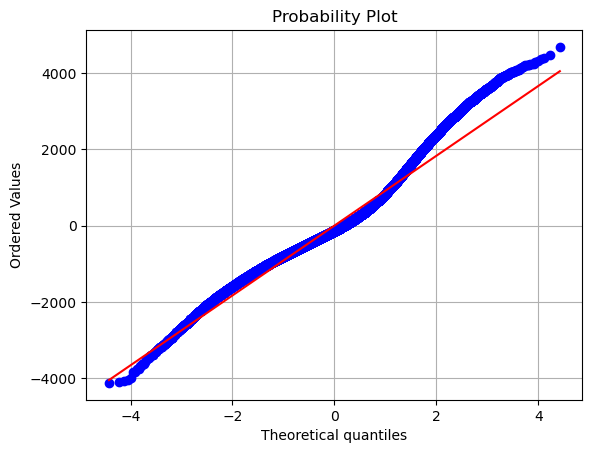

In [44]:
stats.probplot(results.resid,dist="norm",plot=plt)
plt.grid()

#### Teste


In [45]:
X1 = dados_colunas_teste[['Regiao_Nordeste','Regiao_Sudeste','Regiao_Sul','Idade',
       'Nível de Instruçao_Fundamental completo ou equivalente',
       'Nível de Instruçao_Médio incompleto ou equivalente',
       'Nível de Instruçao_Médio completo ou equivalente',
       'Nível de Instruçao_Superior incompleto ou equivalente',
       'Nível de Instruçao_Superior completo',
        'Tipo de Ocupacao_Militar ou segurança pública',
       'Tipo de Ocupacao_Empregado setor privado',
       'Tipo de Ocupacao_Empregado setor público',
       'Tipo de Ocupacao_Conta própria', 'Tipo de Ocupacao_Empregador',
       'Tipo de Ocupacao_Trabalhador familiar não remunerado',
       'Faixa de horas trabalhadas_15 a 39 horas',
       'Faixa de horas trabalhadas_40 a 44 horas',
        'Sexo_Mulher', 'Cor_Raça_Preta', 'Cor_Raça_Parda',
       'Cor_Raça_Indígena', 'Alfabetizado_Não','Situacao do Domicílio_Rural']]
Y1 = dados_colunas_teste['Rendimento Mensal Efetivo']
results1 = regress(Y1, X1)
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Rendimento Mensal Efetivo   R-squared:                       0.223
Model:                                   OLS   Adj. R-squared:                  0.222
Method:                        Least Squares   F-statistic:                     509.4
Date:                       Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                               16:54:28   Log-Likelihood:            -2.9880e+05
No. Observations:                      35620   AIC:                         5.977e+05
Df Residuals:                          35599   BIC:                         5.978e+05
Df Model:                                 20                                         
Covariance Type:                   nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   1295.4780     38.332     33.796      0.000    1220.346    1370.610
Regiao_Nordeste                                         1.308e-11    3.7e-13     35.407      0.000    1.24e-11    1.38e-11
Regiao_Sudeste                                         -2.821e-13   1.77e-14    -15.934      0.000   -3.17e-13   -2.47e-13
Regiao_Sul                                                37.2403     12.709      2.930      0.003      12.331      62.150
Idade                                                      8.3425      0.480     17.378      0.000       7.402       9.283
Nível de Instruçao_Fundamental completo ou equivalente   163.7307     22.993      7.121      0.000     118.663     208.799
Nível de Instruçao_Médio incompleto ou equivalente       208.5012     24.972      8.349      0.000     159.555     257.447
Nível de Instruçao_Médio completo ou equivalente         381.7872     16.752     22.791      0.000     348.954     414.621
Nível de Instruçao_Superior incompleto ou equivalente    458.1471     26.313     17.412      0.000     406.573     509.721
Nível de Instruçao_Superior completo                    1155.0622     20.423     56.556      0.000    1115.032    1195.093
Tipo de Ocupacao_Militar ou segurança pública            619.6774     88.056      7.037      0.000     447.085     792.270
Tipo de Ocupacao_Empregado setor privado                 467.1891     23.614     19.785      0.000     420.906     513.472
Tipo de Ocupacao_Empregado setor público                 778.6287     29.703     26.214      0.000     720.411     836.847
Tipo de Ocupacao_Conta própria                          1146.5258     37.662     30.442      0.000    1072.706    1220.345
Tipo de Ocupacao_Empregador                              226.8092     24.329      9.322      0.000     179.123     274.496
Tipo de Ocupacao_Trabalhador familiar não remunerado    5.104e-13   4.39e-14     11.638      0.000    4.24e-13    5.96e-13
Faixa de horas trabalhadas_15 a 39 horas                -314.6327     16.763    -18.770      0.000    -347.488    -281.778
Faixa de horas trabalhadas_40 a 44 horas                 113.2253     13.639      8.301      0.000      86.492     139.959
Sexo_Mulher                                             -435.6263     12.408    -35.108      0.000    -459.947    -411.306
Cor_Raça_Preta                                          -137.7512     20.889     -6.594      0.000    -178.695     -96.807
Cor_Raça_Parda                                          -109.4160     13.556     -8.071      0.000    -135.986     -82.846
Cor_Raça_Indígena                                     

In [46]:
# Removido = Raça Indígena

X1 = dados_colunas_teste[['Regiao_Nordeste','Regiao_Sudeste','Regiao_Sul','Idade',
       'Nível de Instruçao_Fundamental completo ou equivalente',
       'Nível de Instruçao_Médio incompleto ou equivalente',
       'Nível de Instruçao_Médio completo ou equivalente',
       'Nível de Instruçao_Superior incompleto ou equivalente',
       'Nível de Instruçao_Superior completo',
        'Tipo de Ocupacao_Militar ou segurança pública',
       'Tipo de Ocupacao_Empregado setor privado',
       'Tipo de Ocupacao_Empregado setor público',
       'Tipo de Ocupacao_Conta própria', 'Tipo de Ocupacao_Empregador',
       'Tipo de Ocupacao_Trabalhador familiar não remunerado',
       'Faixa de horas trabalhadas_15 a 39 horas',
       'Faixa de horas trabalhadas_40 a 44 horas',
        'Sexo_Mulher', 'Cor_Raça_Preta', 'Cor_Raça_Parda', 'Alfabetizado_Não','Situacao do Domicílio_Rural']]
Y1 = dados_colunas_teste['Rendimento Mensal Efetivo']
results1 = regress(Y1, X1)
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Rendimento Mensal Efetivo   R-squared:                       0.222
Model:                                   OLS   Adj. R-squared:                  0.222
Method:                        Least Squares   F-statistic:                     536.0
Date:                       Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                               16:54:28   Log-Likelihood:            -2.9881e+05
No. Observations:                      35620   AIC:                         5.977e+05
Df Residuals:                          35600   BIC:                         5.978e+05
Df Model:                                 19                                         
Covariance Type:                   nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   1292.3852     38.296     33.747      0.000    1217.323    1367.447
Regiao_Nordeste                                        -2.199e-11   6.47e-13    -34.008      0.000   -2.33e-11   -2.07e-11
Regiao_Sudeste                                          1.723e-13   2.36e-14      7.294      0.000    1.26e-13    2.19e-13
Regiao_Sul                                                38.3529     12.695      3.021      0.003      13.471      63.235
Idade                                                      8.3534      0.480     17.402      0.000       7.413       9.294
Nível de Instruçao_Fundamental completo ou equivalente   163.8863     22.994      7.127      0.000     118.817     208.955
Nível de Instruçao_Médio incompleto ou equivalente       208.2485     24.972      8.339      0.000     159.302     257.195
Nível de Instruçao_Médio completo ou equivalente         381.8568     16.752     22.795      0.000     349.022     414.691
Nível de Instruçao_Superior incompleto ou equivalente    458.6955     26.312     17.433      0.000     407.123     510.268
Nível de Instruçao_Superior completo                    1155.7951     20.420     56.600      0.000    1115.771    1195.819
Tipo de Ocupacao_Militar ou segurança pública            620.8328     88.057      7.050      0.000     448.239     793.427
Tipo de Ocupacao_Empregado setor privado                 467.5887     23.613     19.802      0.000     421.306     513.871
Tipo de Ocupacao_Empregado setor público                 779.0592     29.703     26.229      0.000     720.841     837.277
Tipo de Ocupacao_Conta própria                          1147.4183     37.660     30.468      0.000    1073.603    1221.234
Tipo de Ocupacao_Empregador                              227.4942     24.327      9.351      0.000     179.812     275.177
Tipo de Ocupacao_Trabalhador familiar não remunerado   -1.685e-13   1.42e-14    -11.858      0.000   -1.96e-13   -1.41e-13
Faixa de horas trabalhadas_15 a 39 horas                -314.4772     16.763    -18.760      0.000    -347.333    -281.621
Faixa de horas trabalhadas_40 a 44 horas                 113.2119     13.640      8.300      0.000      86.478     139.946
Sexo_Mulher                                             -435.5361     12.409    -35.100      0.000    -459.857    -411.215
Cor_Raça_Preta                                          -136.0889     20.870     -6.521      0.000    -176.995     -95.183
Cor_Raça_Parda                                          -107.6526     13.522     -7.961      0.000    -134.157     -81.149
Alfabetizado_Não                                      

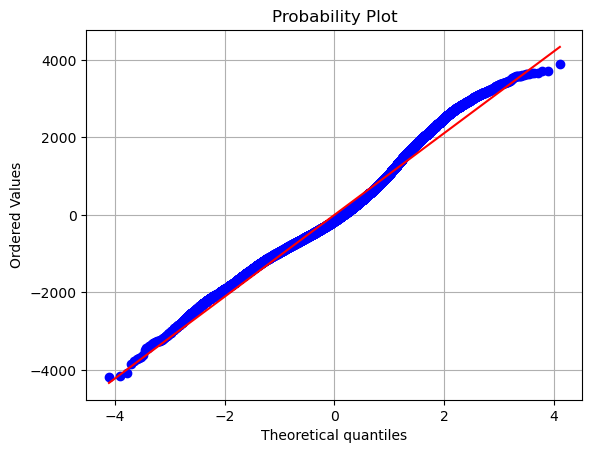

In [47]:
stats.probplot(results1.resid,dist="norm",plot=plt)
plt.grid()

##### Análise dos resultados:

## t-Student

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
import numpy as np
import scipy.stats as stats

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### Treino


In [49]:
random=RandomForestRegressor(n_estimators=100,random_state=42)
x_treino,x_teste,Y_treino,Y_teste=train_test_split(a, dados_colunas['Rendimento Mensal Efetivo'],test_size=0.33,random_state=42)
random.fit(x_treino,Y_treino)

RandomForestRegressor(random_state=42)

In [50]:
y_previsao_treino=random.predict(x_treino)
mae = mean_absolute_error(Y_treino,y_previsao_treino)
mse = (mean_squared_error(Y_treino, y_previsao_treino))**0.5
r2 = r2_score(Y_treino, y_previsao_treino)
mae, mse, r2

(0.009082498072474849, 0.11056803699472753, 0.9999999914172963)

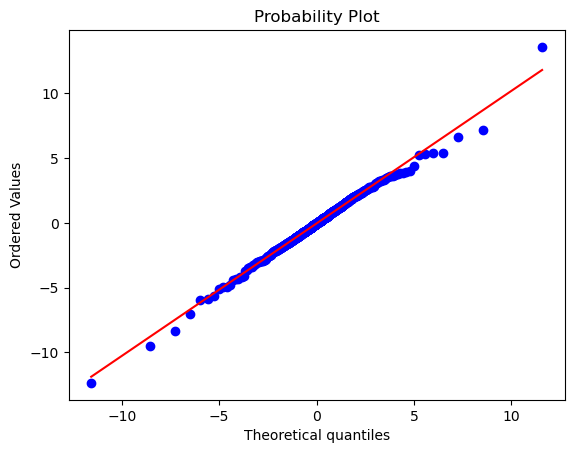

In [51]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Exemplo de dados simulados (substitua com seus dados reais)
y_previsao_treino = np.random.standard_t(df=3, size=1000)

# Definindo o número de graus de liberdade (df)
df = 3

# Probplot com a distribuição t
stats.probplot(y_previsao_treino, dist="t", sparams=(df,), plot=plt)
plt.show()

#### Teste


In [52]:
random.fit(x_teste,Y_teste)

RandomForestRegressor(random_state=42)

In [53]:
y_previsao_teste=random.predict(x_teste)
mae = mean_absolute_error(Y_teste,y_previsao_teste)
mse = (mean_squared_error(Y_teste, y_previsao_teste))**0.5
r2 = r2_score(Y_teste, y_previsao_teste)
mae, mse, r2

(0.017928265160280232, 0.18747212411036265, 0.9999999750766241)

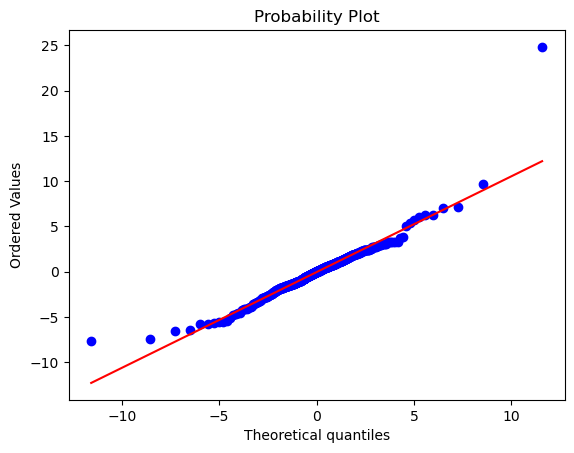

In [54]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Exemplo de dados simulados (substitua com seus dados reais)
y_previsao_teste = np.random.standard_t(df=3, size=1000)

# Definindo o número de graus de liberdade (df)
df = 3

# Probplot com a distribuição t
stats.probplot(y_previsao_teste, dist="t", sparams=(df,), plot=plt)
plt.show()


#### Análise dos resultados:
